In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
data_state = pd.read_csv('/home/brandon/IU International University/Project: From Model to Production/opp-stops_state.csv')

In [3]:
data_state.head()

state       city geography    subgeography subject_race  search_rate  \
0    AZ  Statewide        AZ   Apache County        white          NaN   
1    AZ  Statewide        AZ   Apache County        black          NaN   
2    AZ  Statewide        AZ   Apache County     hispanic          NaN   
3    AZ  Statewide        AZ  Cochise County        white          NaN   
4    AZ  Statewide        AZ  Cochise County        black          NaN   

   stop_rate  hit_rate  inferred_threshold  stops_per_year    stop_rate_n  
0   0.077444       NaN                 NaN     7064.888889  293234.024096  
1   0.115928       NaN                 NaN      385.246753   32012.963855  
2   0.065497       NaN                 NaN     1280.962025  137774.746988  
3   0.077444       NaN                 NaN    12371.855422  293234.024096  
4   0.115928       NaN                 NaN     1568.810127   32012.963855

In [4]:
profile_state = ProfileReport(data_state, title="Profiling Report")

In [5]:
profile_state.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data_city = pd.read_csv('/home/brandon/IU International University/Project: From Model to Production/opp-stops_city.csv')

In [7]:
data_city.head()

city state    geography subgeography subject_race  search_rate  \
0  Little Rock    AR  Little Rock          NaN        white          NaN   
1  Little Rock    AR  Little Rock          NaN        black          NaN   
2  Bakersfield    CA  Bakersfield      Central        white          NaN   
3  Bakersfield    CA  Bakersfield      Central        black          NaN   
4  Bakersfield    CA  Bakersfield      Central     hispanic          NaN   

   stop_rate  hit_rate  inferred_threshold  stops_per_year   stop_rate_n  
0   0.071922       NaN                 NaN     6576.000000   6576.000000  
1   0.093812       NaN                 NaN     7684.363636   7684.363636  
2   0.084260       NaN                 NaN     2335.034483  10587.172414  
3   0.086928       NaN                 NaN      523.034483   2308.551724  
4   0.035380       NaN                 NaN     1238.482759   6489.655172

In [8]:
profile_city = ProfileReport(data_city, title="Profiling Report")

In [9]:
profile_city.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#View the top 10 states with the most stops
state_stops = data_state.groupby('state').size().sort_values(ascending=False).head(10)
print(state_stops)


state
TX    765
GA    480
NC    303
TN    285
OH    267
FL    221
WI    212
CO    193
NY    187
CA    177
dtype: int64


In [11]:
#View the top 10 cities with the most stops
city_stops = data_city.groupby('city').size().sort_values(ascending=False).head(10)
print(city_stops)

city
Los Angeles      4918
Saint Paul        598
Tulsa             520
San Antonio       348
Cincinnati        314
Oakland           235
Oklahoma City     150
Arlington         118
Plano              72
San Diego          66
dtype: int64


In [12]:
#Impute numerical missing values with the mean
state_stops = data_state.fillna(data_state.mean())
city_stops = data_city.fillna(data_city.mean())

/tmp/ipykernel_109836/2363021728.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  state_stops = data_state.fillna(data_state.mean())
/tmp/ipykernel_109836/2363021728.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  city_stops = data_city.fillna(data_city.mean())


In [13]:
state_stops.describe()

search_rate    stop_rate     hit_rate  inferred_threshold  \
count  4053.000000  4053.000000  4053.000000         4053.000000   
mean      0.031270     0.069004     0.310281            0.191286   
std       0.008769     0.047903     0.061399            0.038387   
min       0.002411     0.007299     0.015385            0.012817   
25%       0.031270     0.039236     0.310281            0.191286   
50%       0.031270     0.067230     0.310281            0.191286   
75%       0.031270     0.088310     0.310281            0.191286   
max       0.150114     0.313480     0.753425            0.504235   

       stops_per_year   stop_rate_n  
count     4053.000000  4.053000e+03  
mean      3329.237834  2.993479e+05  
std      10657.008891  3.927000e+05  
min         12.000000  4.864000e+02  
25%        103.726027  4.021800e+04  
50%        652.500000  1.344720e+05  
75%       2837.454545  4.612054e+05  
max     365210.909091  1.917549e+06

In [14]:
city_stops.describe()

search_rate    stop_rate     hit_rate  inferred_threshold  \
count  7746.000000  7746.000000  7746.000000         7746.000000   
mean      0.072806     0.158824     0.138806            0.061288   
std       0.009665     0.097831     0.015164            0.006492   
min       0.012293     0.012908     0.000000            0.001227   
25%       0.072806     0.107721     0.138806            0.061288   
50%       0.072806     0.110808     0.138806            0.061288   
75%       0.072806     0.219998     0.138806            0.061288   
max       0.479167     0.855622     0.434109            0.244116   

       stops_per_year    stop_rate_n  
count     7746.000000    7746.000000  
mean       339.000660  101569.703273  
std       1805.104314   73244.595533  
min         12.000000      37.714286  
25%         24.000000   15944.089888  
50%         62.620192  109763.600000  
75%        180.507143  120984.266667  
max      65379.400000  213069.733333

In [15]:
state_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               4053 non-null   object 
 1   city                4053 non-null   object 
 2   geography           4053 non-null   object 
 3   subgeography        4020 non-null   object 
 4   subject_race        4053 non-null   object 
 5   search_rate         4053 non-null   float64
 6   stop_rate           4053 non-null   float64
 7   hit_rate            4053 non-null   float64
 8   inferred_threshold  4053 non-null   float64
 9   stops_per_year      4053 non-null   float64
 10  stop_rate_n         4053 non-null   float64
dtypes: float64(6), object(5)
memory usage: 348.4+ KB


In [16]:
city_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746 entries, 0 to 7745
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                7746 non-null   object 
 1   state               7746 non-null   object 
 2   geography           7746 non-null   object 
 3   subgeography        7670 non-null   object 
 4   subject_race        7746 non-null   object 
 5   search_rate         7746 non-null   float64
 6   stop_rate           7746 non-null   float64
 7   hit_rate            7746 non-null   float64
 8   inferred_threshold  7746 non-null   float64
 9   stops_per_year      7746 non-null   float64
 10  stop_rate_n         7746 non-null   float64
dtypes: float64(6), object(5)
memory usage: 665.8+ KB


In [17]:
#Get dataset numerical columns
city_stops_num = city_stops.select_dtypes(include=['int64','float64'])
state_stops_num = state_stops.select_dtypes(include=['int64','float64'])

In [18]:
import subprocess
import mlflow
from pycaret.classification import *

# Set the MLflow tracking URI
mlflow.set_tracking_uri("sqlite:///mlruns.db")

# Start the MLflow server on a different port (e.g., 5001)
mlflow_server_command = "mlflow server --backend-store-uri sqlite:///mlruns.db --default-artifact-root ./mlflow-artifacts --port 5001"
process = subprocess.Popen(mlflow_server_command, shell=True)

# Wait for the MLflow server to start (optional)
# Add any necessary code here that depends on the MLflow server being up and running

# Continue with MLflow tracking and classification

# Create Backend for MLflow
mlflow.start_run()
mlflow.set_tags({"Description": "Classification Model"})
mlflow.set_tags({"Developer": "Brandon"})
mlflow.log_param("Dataset", "State Stops")

# Classification Model
clf = setup(data=state_stops, target='subject_race', session_id=123, log_experiment=True, experiment_name='Classification_State_Metrics')

# End the MLflow run
mlflow.end_run()

# Stop the MLflow server
process.terminate()






[2023-07-07 21:43:48 +0300] [109959] [INFO] Starting gunicorn 20.1.0
[2023-07-07 21:43:48 +0300] [109959] [ERROR] Connection in use: ('127.0.0.1', 5001)
[2023-07-07 21:43:48 +0300] [109959] [ERROR] Retrying in 1 second.


[2023-07-07 21:43:49 +0300] [109959] [ERROR] Connection in use: ('127.0.0.1', 5001)
[2023-07-07 21:43:49 +0300] [109959] [ERROR] Retrying in 1 second.
[2023-07-07 21:43:50 +0300] [109959] [ERROR] Connection in use: ('127.0.0.1', 5001)
[2023-07-07 21:43:50 +0300] [109959] [ERROR] Retrying in 1 second.
[2023-07-07 21:43:51 +0300] [109959] [ERROR] Connection in use: ('127.0.0.1', 5001)
[2023-07-07 21:43:51 +0300] [109959] [ERROR] Retrying in 1 second.
[2023-07-07 21:43:52 +0300] [109959] [ERROR] Connection in use: ('127.0.0.1', 5001)
[2023-07-07 21:43:52 +0300] [109959] [ERROR] Retrying in 1 second.
[2023-07-07 21:43:53 +0300] [109959] [ERROR] Can't connect to ('127.0.0.1', 5001)
Running the mlflow server failed. Please see the logs above for details.


In [19]:
best = compare_models()

In [20]:
#Evaluate model performance
eval = evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['search_rate', 'stop_rate',
                                             'hit_rate', 'inferred_threshold',
                                             'stops_per_year', 'stop_rate_n'],
                                    transformer=SimpleImputer(add_indicator...
                 TransformerWrapper(exclude=None, include=['subgeography'],
                                    transformer=LeaveOneOutEncoder(cols=['subgeography'],
                                                                   drop_invariant=False,
                                                                   handle_missing='return_nan',
                                                                   handle_unknown='value',
                                                                   random_state=123,
                                                                   return_df=True,
                                                                   sigma=None,
                                                                   verbose=0))),
                ('actual_estimator',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

In [22]:
save_model(best, 'Final Classification Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['search_rate', 'stop_rate',
                                              'hit_rate', 'inferred_threshold',
                                              'stops_per_year', 'stop_rate_n'],
                                     transformer=SimpleImputer(add_indicator...
                  TransformerWrapper(exclude=None, include=['subgeography'],
                                     transformer=LeaveOneOutEncoder(cols=['subgeography'],
                                                                    drop_invariant=False,
                                                                    handle_missing='return_nan',


In [23]:
#Predict on new data
predict_model(best, data=state_stops)

state       city geography      subgeography  search_rate  stop_rate  \
0       AZ  Statewide        AZ     Apache County      0.03127   0.077444   
1       AZ  Statewide        AZ     Apache County      0.03127   0.115928   
2       AZ  Statewide        AZ     Apache County      0.03127   0.065497   
3       AZ  Statewide        AZ    Cochise County      0.03127   0.077444   
4       AZ  Statewide        AZ    Cochise County      0.03127   0.115928   
...    ...        ...       ...               ...          ...        ...   
4048    WI  Statewide        WI  Winnebago County      0.03127   0.032153   
4049    WI  Statewide        WI  Winnebago County      0.03127   0.018971   
4050    WI  Statewide        WI       Wood County      0.03127   0.035205   
4051    WI  Statewide        WI       Wood County      0.03127   0.032153   
4052    WI  Statewide        WI       Wood County      0.03127   0.018971   

      hit_rate  inferred_threshold  stops_per_year    stop_rate_n  \
0     0.310281            0.191286     7064.888672  293234.031250   
1     0.310281            0.191286      385.246765   32012.962891   
2     0.310281            0.191286     1280.962036  137774.750000   
3     0.310281            0.191286    12371.855469  293234.031250   
4     0.310281            0.191286     1568.810181   32012.962891   
...        ...                 ...             ...            ...   
4048  0.310281            0.191286      200.081635   11545.958984   
4049  0.310281            0.191286      184.500000    7220.326660   
4050  0.310281            0.191286     1351.836792  165997.218750   
4051  0.310281            0.191286       22.769230   11545.958984   
4052  0.310281            0.191286       38.048782    7220.326660   

     subject_race prediction_label  prediction_score  
0           white            white               1.0  
1           black            black               1.0  
2        hispanic         hispanic               1.0  
3           white            white               1.0  
4           black            black               1.0  
...           ...              ...               ...  
4048        black            black               1.0  
4049     hispanic         hispanic               1.0  
4050        white            white               1.0  
4051        black            black               1.0  
4052     hispanic         hispanic               1.0  

[4053 rows x 13 columns]

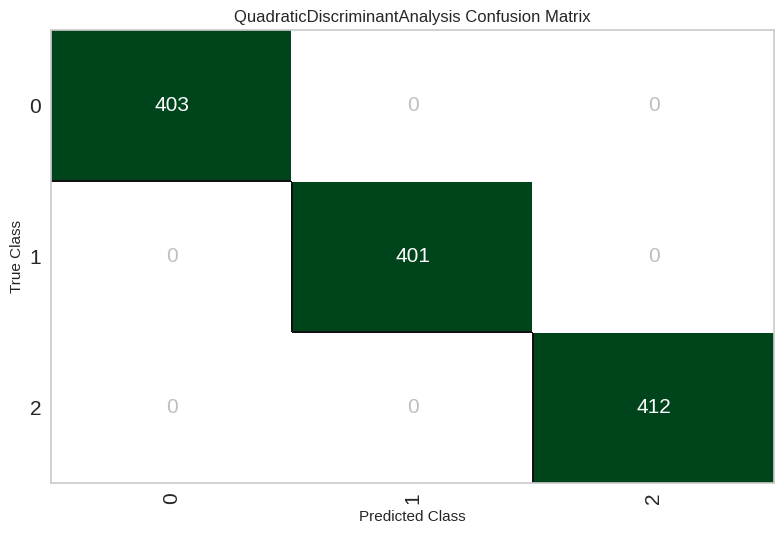

In [24]:
#Plot the findings
plot_model(best, plot='confusion_matrix')

In [25]:
#Evidently Drift Report
check_drift(reference_data=state_stops, target='subject_race')


'Classification_State_Metrics_1688755676_Drift_Report.html'

In [ ]:
#Important IPs
#Prometheus: localhost:9090
#MLFlow: localhost:5001
#Grafana: localhost:3000

#start the Grafana server
#sudo service grafana-server start

#start the Prometheus server
#./prometheus --config.file=prometheus.yml